# Atividade 1 - Tópicos especiais em estatística (aula 1)

# Stroke Prediction Dataset

Link para acessar as informações sobre os dados [aqui](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

## Explicação das variáveis desse conjunto de dados

1. id: identificador único (será retirado do banco de dados por não servir de nada nessa análise)
2. gender: pode ser "masculino", "feminino" ou "outros"
3. age: idade do paciente
4. hypertension: 0 se o paciente não tem hipertensão e 1 se o paciente tem hipertensão
5. heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca e 1 se o paciente tiver alguma doença cardíaca
6. ever_married: se já foi casado ou não
7. work_type: tipo de emprego
8. Residence_type: zona rural ou zona urbana
9. avg_glucose_level: nível médio de glicose no sangue
10. bmi: índice de massa corporal (IMC)
11. smoking_status: paara saber se o paciente é um fumante, se é um ex-fumante, se nunca fumou ou "desconhecido"
12. stroke: 1 se o paciente teve AVC e 0 se o paciente não teve AVC

**Observação**: "desconhecido" na variável *smoke_status* significa que essa informação não está disponível para este paciente.

## Importando as principais bibliotecas

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Carregando o conjunto de dados

In [ ]:
dados = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

## Análise exploratória

In [ ]:
## as 10 primeiras linhas do conjunto de dados
dados.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
## as 10 ultimas linhas do conjunto de dados
dados.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


📌 Retirarei a coluna `id` por não ter importância alguma no contexto desta análise

In [ ]:
dados = dados.drop(columns = ['id'])

In [ ]:
## verificando se a coluna foi retirada
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
## verificando se há dados faltantes em alguma coluna e o tipo das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


📌 Notamos que a variável bmi (IMC) possui 201 dados faltantes (missing). Trataremos disso preenchendo onde existe `missing` com a mediana dessa variável.

In [ ]:
## substituir o missing pela mediana da variável
dados['bmi'].fillna(dados['bmi'].median(), inplace  = True)

In [ ]:
## conferindo se a substituição funcionou
dados.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
## verificando algumas estatísticas dos dados quantitavos do conjunto de dados
dados.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Vamos começar a análisar variável por variável

In [ ]:
## como essa é uma variável nominal, verificaremos as classes e quantos indivíduos estão em cada classe
np.unique(dados['gender'], return_counts = True)

(array(['Female', 'Male', 'Other'], dtype=object), array([2994, 2115,    1]))

📌 Vamos analisar graficamente

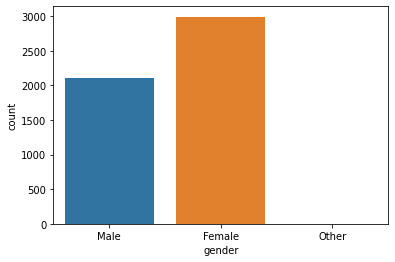

In [ ]:
sns.countplot(x = dados['gender'])

📌 Análisando esta variável, podemos observar que apenas uma pessoa se identificou com o genero `other` e que a maioria dos entrevistados são do sexo feminino

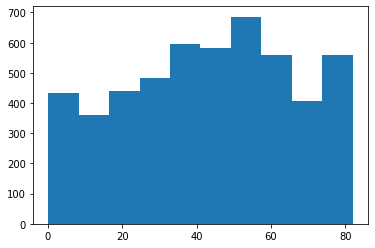

In [ ]:
## histograma da coluna age
plt.hist(x = dados['age'])
plt.show()

📌 Aqui podemos observar que a maioria dos entrevistados tem entre 30 e 60 anos de idade

In [ ]:
## verificando a coluna hypertension
np.unique(dados['hypertension'], return_counts = True)

(array([0, 1]), array([4612,  498]))

📌 Aqui temos que prestar atenção, porque essa variável é dicotômica, em que `0` significa `não` e `1` significa `sim`.
Agora vamos analisar graficamente

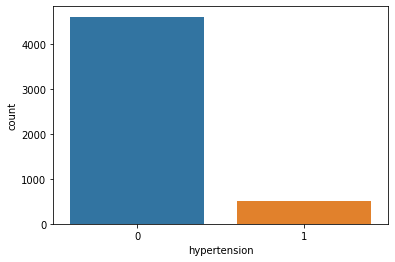

In [ ]:
sns.countplot(x = dados['hypertension'])

📌 Aqui podemos observar que a maioria dos entrevistados não tem hipertensão

In [ ]:
## verificando a coluna heart_disease
np.unique(dados['heart_disease'], return_counts = True)

(array([0, 1]), array([4834,  276]))

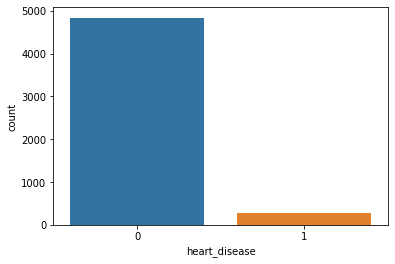

In [ ]:
sns.countplot(x = dados['heart_disease'])

📌 Podemos notar que esta variável se comporta de forma similar a anterior. Isso significa que a maioria dos entrevistados também não tem problema no coração

In [ ]:
## verificando a coluna ever_married
np.unique(dados['ever_married'], return_counts = True)

(array(['No', 'Yes'], dtype=object), array([1757, 3353]))

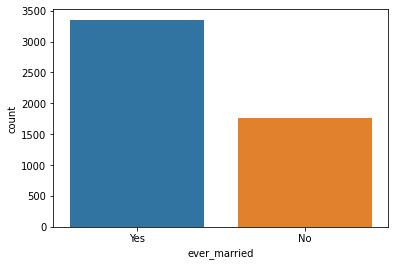

In [ ]:
sns.countplot(x = dados['ever_married'])

📌 Neste caso, a variável também é dicotômica, mas não foi classificada como `0` ou `1`, mas podemos observar que a maioria dos entrevistados já se casou pelo menos uma vez na vida

In [ ]:
## verificando a coluna work_type
np.unique(dados['work_type'], return_counts = True)

(array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object), array([ 657,   22, 2925,  819,  687]))

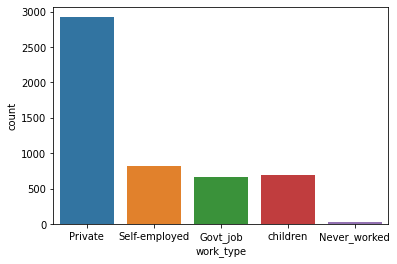

In [ ]:
sns.countplot(x = dados['work_type'])

📌 Mais um vez estamos trabalhando com uma variável nominal. Dessa variável podemos observar que: 
- a maioria dos entrevistados trabalham para empresas privadas;
- autônomos, empregados do estado e crianças possuem praticamente a mesma quantidade de pessoas nesse estudo;
- pouquíssimos entrevistados nunca trabalharam mesmo sem ser considerados mais como crianças.

In [ ]:
## verificando a coluna Residence_type
np.unique(dados['Residence_type'], return_counts = True)

(array(['Rural', 'Urban'], dtype=object), array([2514, 2596]))

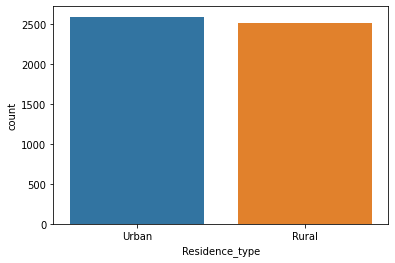

In [ ]:
sns.countplot(x = dados['Residence_type'])

📌 Aqui podemos ver que os dois tipos de moradia possuem quase o mesmo número de entrevistados nesse estudo

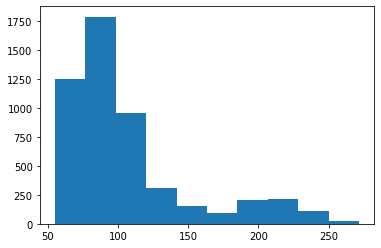

In [ ]:
## histograma da coluna avg_glucose_level
plt.hist(x = dados['avg_glucose_level'])
plt.show()

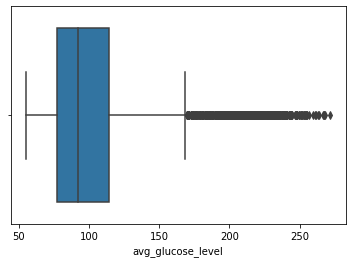

In [ ]:
## boxplot da coluna avg_glucose_level
sns.boxplot(x = 'avg_glucose_level', data = dados)

In [ ]:
dados['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

📌 Análisaremos esse histograma juntamente com o boxplot e o describe:
- podemos observar que apenas 25% dos entrevistados possuem o nível médio da glicose acima de 114

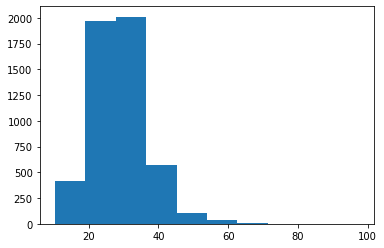

In [ ]:
## histograma da coluna bmi
plt.hist(x = dados['bmi'])
plt.show()

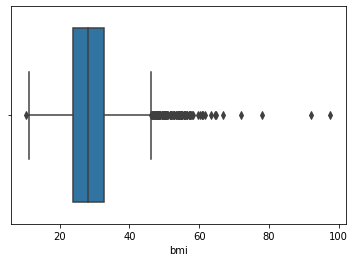

In [ ]:
## boxplot da coluna bmi
sns.boxplot(x = 'bmi', data = dados)

In [ ]:
dados['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

📌 Aqui podemos observar que a média do IMC dos entrevistados é aproximadamente 28.86 e que apenas 25% dos entrevistados tem o IMC abaixo de 23.8

In [ ]:
## verificando a coluna smoking_status
np.unique(dados['smoking_status'], return_counts = True)

(array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object), array([1544,  885, 1892,  789]))

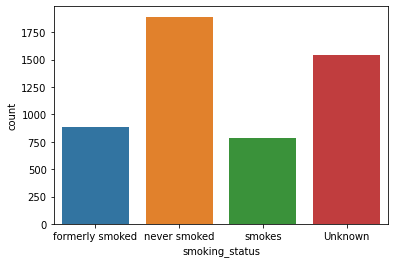

In [ ]:
sns.countplot(x = dados['smoking_status'])

📌 Podemos observar que a maioria dos entrevistados nunca fumou, mas que existem muitos classificados como `unknown`, ou seja, que não foi possível obter essa resposta.

In [ ]:
## verificando a coluna stoke
np.unique(dados['stroke'], return_counts = True)

(array([0, 1]), array([4861,  249]))

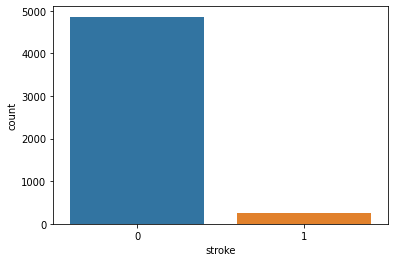

In [ ]:
sns.countplot(x = dados['stroke'])

📌 Aqui podemos ver claramente que a maioria dos entrevistados não tiveram derrame.

## Análise de correlação
- Primeiramente teremos que realizar a padronização dos dados numéricos das variáveis `age`, `avg_glucose_level` e `bmi` com StardardScaler
- Para podermos fazer uma análise de correlação no Python precisaremos que as variáveis sejam todas numéricas, para isso nós utilizaremos o LabelEnconder.
- Para trabalharmos com o LabelEncoder precisaremos transformar o nosso conjunto de dados, que atualmente é um data frame, em uma matriz (array).
- Logo após precisaremos retornar para data frame para darmos seguimento a analise de correlação.

In [ ]:
# Padronizando as variáveis citadas com StandardScaler
cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
dados[cols] = scaler.fit_transform(dados[cols])

In [ ]:
## transformando o DataFrame em array
dados = dados.values

In [ ]:
dados

array([['Male', 1.0514342842814732, 0, ..., 1.0050859652921758,
        'formerly smoked', 1],
       ['Female', 0.7860700726610688, 0, ..., -0.0989809248336594,
        'never smoked', 1],
       ['Male', 1.6263900761256826, 0, ..., 0.4725360535844198,
        'never smoked', 1],
       ...,
       ['Female', -0.36384151102735024, 0, ..., 0.2257446310857039,
        'never smoked', 0],
       ['Male', 0.34379638662706147, 0, ..., -0.4237064807530227,
        'formerly smoked', 0],
       ['Female', 0.034204806403256335, 0, ..., -0.3457723473323758,
        'Unknown', 0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_ever_married = LabelEncoder()
label_encoder_work_type = LabelEncoder()
label_encoder_Residence_type = LabelEncoder()
label_encoder_smoking_status = LabelEncoder()

In [ ]:
dados[:, 0] = label_encoder_gender.fit_transform(dados[:, 0])
dados[:, 4] = label_encoder_ever_married.fit_transform(dados[:, 4])
dados[:, 5] = label_encoder_work_type.fit_transform(dados[:, 5])
dados[:, 6] = label_encoder_Residence_type.fit_transform(dados[:, 6])
dados[:, 9] = label_encoder_smoking_status.fit_transform(dados[:, 9])

In [ ]:
## Transformando o array em DataFrame
dados = pd.DataFrame(dados, columns = ['gender', 'age',	'hypertension',	'heart_disease', 'ever_married', 'work_type', 'Residence_type',	'avg_glucose_level', 'bmi',	'smoking_status', 'stroke'])

In [ ]:
dados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1
1,0,0.78607,0,0,1,3,0,2.121559,-0.098981,2,1
2,1,1.62639,0,1,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.62639,1,0,1,2,1,-0.494658,-0.098981,2,0
5106,0,1.670617,0,0,1,3,1,0.420775,1.446713,2,0
5107,0,-0.363842,0,0,1,3,0,-0.511443,0.225745,2,0
5108,1,0.343796,0,0,1,2,0,1.328257,-0.423706,1,0


📌 Agora todos os dados estão sendo representados numericamente

In [ ]:
## verificando os tipos das variáveis no data frame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   object
 2   hypertension       5110 non-null   object
 3   heart_disease      5110 non-null   object
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   object
 8   bmi                5110 non-null   object
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   object
dtypes: object(11)
memory usage: 439.3+ KB


📌 Todas as variáveis estão objeto, temos que mudar para inteiros (int) e contínuos (float)

In [ ]:
dados = dados.infer_objects()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


📌 Agora sim podemos seguir para a análise de correlação 

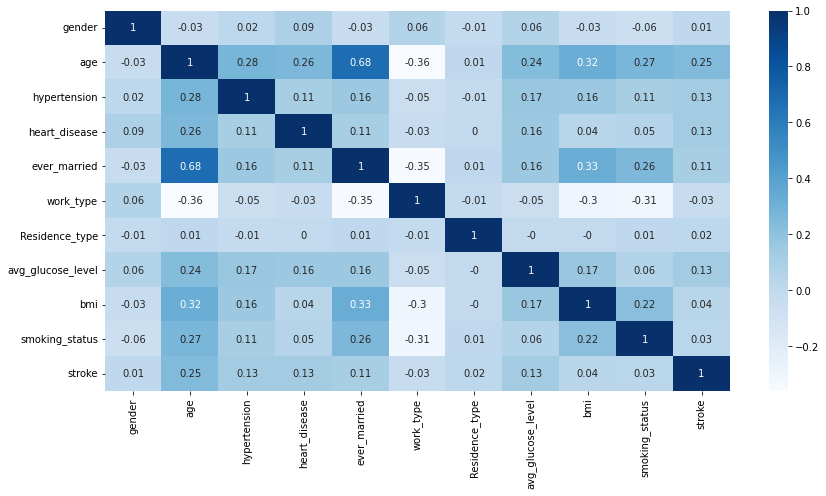

In [ ]:
correlation = dados.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

📌 Podemos destacar aqui que as variáveis mais correlacionadas entre sí são `ever_married` e `age`. As outras variáveis apresentaram poquíssima ou nenhuma correlação entre sí.